In [5]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

In [6]:
data = pd.read_csv('wines_2012.csv', delimiter=',')
data.head()

,judge,flight,wine,score,wine.amer,judge.amer
0,Jean-M Cardebat,white,A1,10.0,1,0
1,Jean-M Cardebat,white,B1,13.0,1,0
2,Jean-M Cardebat,white,C1,14.0,0,0
3,Jean-M Cardebat,white,D1,15.0,0,0
4,Jean-M Cardebat,white,E1,8.0,1,0


In [7]:
data['judge_num'] = pd.factorize(data['judge'])[0] + 1
data['wine_num'] = pd.factorize(data['wine'])[0] + 1

# Normalizing the score
mean_score = data['score'].mean()
std_score = data['score'].std()
data['score_est'] = (data['score'] - mean_score) / std_score

# Display the resulting DataFrame
data.head()

,judge,flight,wine,score,wine.amer,judge.amer,judge_num,wine_num,score_est
0,Jean-M Cardebat,white,A1,10.0,1,0,1,1,-1.576604
1,Jean-M Cardebat,white,B1,13.0,1,0,1,2,-0.450458
2,Jean-M Cardebat,white,C1,14.0,0,0,1,3,-0.075076
3,Jean-M Cardebat,white,D1,15.0,0,0,1,4,0.300306
4,Jean-M Cardebat,white,E1,8.0,1,0,1,5,-2.327368


In [8]:
n_judges = len(data['judge'].unique())
n_wines = len(data['wine'].unique())
n_scores = len(data)

wine_data_list = {
    'n_judges': n_judges,
    'n_wines': n_wines,
    'N': n_scores,
}

print(wine_data_list)

{'n_judges': 9, 'n_wines': 20, 'N': 180}


In [9]:
wine_data_list['S'] = data['score_est'].values
wine_data_list['wine'] = data['wine_num'].values
wine_data_list['judge'] = data['judge_num'].values

In [10]:
n_judges = wine_data_list['n_judges']
n_wines = wine_data_list['n_wines']
N = wine_data_list['N']
S = wine_data_list['S']
wine = wine_data_list['wine']
judge = wine_data_list['judge']

with pm.Model() as wine_model_1:
    # Parameters
    Q = pm.Normal('Q', mu=0, sigma=1, shape=n_wines)
    sigma = pm.Exponential('sigma', lam=1)

    # Transformed parameters
    media_score = Q[wine-1] # Python is 0-indexed

    # Model
    S_observed = pm.Normal('S', mu=media_score, sigma=sigma, observed=S)

In [11]:
with wine_model_1:
    trace = pm.sample(
        draws=2000,       # Number of sampling iterations
        tune=1000,        # Number of warmup iterations
        chains=4,         # Number of chains
        cores=4,          # Number of parallel chains
        target_accept=0.9 # Adjust acceptance rate to affect step size
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Q, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 21 seconds.


In [12]:
az.summary(trace, var_names=["Q", "sigma"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Q[0],0.143,0.321,-0.451,0.763,0.003,0.004,15102.0,5672.0,1.0
Q[1],0.270,0.317,-0.313,0.870,0.003,0.003,14276.0,5182.0,1.0
Q[2],-0.122,0.318,-0.739,0.447,0.003,0.004,15979.0,6396.0,1.0
Q[3],0.288,0.319,-0.273,0.930,0.002,0.003,16930.0,5976.0,1.0
Q[4],0.087,0.317,-0.497,0.698,0.002,0.004,16708.0,6126.0,1.0
Q[5],-0.009,0.322,-0.623,0.603,0.003,0.004,15601.0,5695.0,1.0
Q[6],-0.104,0.313,-0.672,0.491,0.003,0.003,13860.0,6289.0,1.0
Q[7],-0.223,0.313,-0.806,0.361,0.002,0.003,17742.0,6093.0,1.0
Q[8],-0.142,0.319,-0.764,0.439,0.003,0.003,15731.0,5694.0,1.0
Q[9],-0.164,0.314,-0.741,0.438,0.003,0.003,14250.0,5984.0,1.0


In [13]:
summary_df = az.summary(trace, var_names=["Q", "sigma"])
summary_df = summary_df[~summary_df.index.str.contains("lp__")]
summary_df = summary_df[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat', 'ess_bulk', 'ess_tail']]
summary_df.columns = ['mean', 'sd', 'q3', 'q97', 'rhat', 'ess_bulk', 'ess_tail']
summary_df = summary_df.round(5)
print(summary_df)


        mean     sd     q3    q97  rhat  ess_bulk  ess_tail
Q[0]   0.143  0.321 -0.451  0.763   1.0   15102.0    5672.0
Q[1]   0.270  0.317 -0.313  0.870   1.0   14276.0    5182.0
Q[2]  -0.122  0.318 -0.739  0.447   1.0   15979.0    6396.0
Q[3]   0.288  0.319 -0.273  0.930   1.0   16930.0    5976.0
Q[4]   0.087  0.317 -0.497  0.698   1.0   16708.0    6126.0
Q[5]  -0.009  0.322 -0.623  0.603   1.0   15601.0    5695.0
Q[6]  -0.104  0.313 -0.672  0.491   1.0   13860.0    6289.0
Q[7]  -0.223  0.313 -0.806  0.361   1.0   17742.0    6093.0
Q[8]  -0.142  0.319 -0.764  0.439   1.0   15731.0    5694.0
Q[9]  -0.164  0.314 -0.741  0.438   1.0   14250.0    5984.0
Q[10]  0.099  0.314 -0.500  0.679   1.0   16529.0    6081.0
Q[11]  0.554  0.317 -0.043  1.143   1.0   15857.0    5317.0
Q[12] -0.365  0.321 -0.959  0.239   1.0   17017.0    5872.0
Q[13]  0.276  0.320 -0.313  0.878   1.0   14106.0    5679.0
Q[14]  0.120  0.310 -0.453  0.709   1.0   12646.0    6022.0
Q[15] -0.029  0.322 -0.624  0.576   1.0 

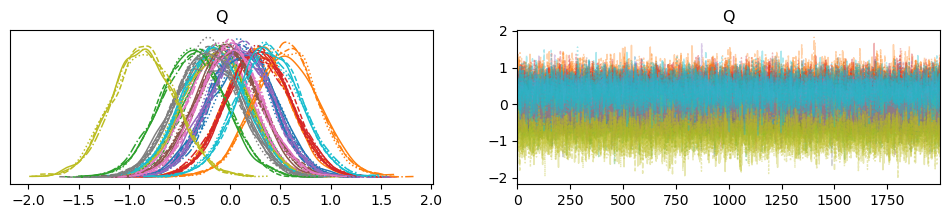

In [14]:
Q_chain1 = trace.posterior['Q']
az.plot_trace(Q_chain1)
plt.show()

In [15]:
import graphviz
from pymc import model_to_graphviz
import os
os.environ["PATH"] += os.pathsep + 'c:\Program Files\Graphviz/bin/'

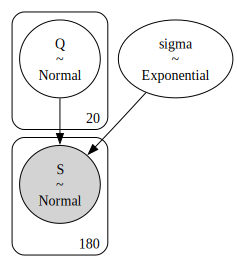

In [16]:
model_to_graphviz(wine_model_1)

Extendiendo el modelo de variable latente

In [17]:
wine_data_list['n_origins'] = len(data['wine.amer'].unique())
wine_data_list['origins'] = data['wine.amer'].values

n_origins = wine_data_list['n_origins']
origin = wine_data_list['origins']

In [18]:
with pm.Model() as wine_model_2:
    # Parameters
    Q = pm.Normal('Q', mu=0, sigma=1, shape=n_wines)
    O = pm.Normal('O', mu=0, sigma=1, shape=n_origins)
    sigma = pm.Exponential('sigma', lam=1)

    # Transformed parameters
    media_score = Q[wine-1] + O[origin-1] # Python is 0-indexed

    # Model
    S_observed = pm.Normal('S', mu=media_score, sigma=sigma, observed=S)

    trace_2 = pm.sample(
        draws=2000,       # Number of sampling iterations
        tune=1000,        # Number of warmup iterations
        chains=4,         # Number of chains
        cores=4,          # Number of parallel chains
        target_accept=0.9 # Adjust acceptance rate to affect step size
    )
    
    dif_origen = pm.Deterministic('dif_origen', O[0] - O[1])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Q, O, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 23 seconds.


In [19]:
az.summary(trace_2, var_names=["O", "Q", "sigma"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
O[0],-0.068,0.291,-0.617,0.474,0.006,0.004,2106.0,3183.0,1.0
O[1],0.108,0.351,-0.537,0.802,0.007,0.005,2355.0,3479.0,1.0
Q[0],0.194,0.414,-0.578,0.988,0.007,0.005,3775.0,4935.0,1.0
Q[1],0.327,0.409,-0.425,1.103,0.007,0.005,3839.0,4944.0,1.0
Q[2],-0.222,0.451,-1.075,0.610,0.008,0.005,3491.0,5301.0,1.0
Q[3],0.193,0.447,-0.671,1.013,0.007,0.005,3568.0,4654.0,1.0
Q[4],0.145,0.410,-0.632,0.895,0.007,0.005,3877.0,5132.0,1.0
Q[5],0.053,0.408,-0.723,0.798,0.007,0.005,3911.0,5303.0,1.0
Q[6],-0.048,0.411,-0.818,0.712,0.007,0.005,3904.0,5175.0,1.0
Q[7],-0.315,0.447,-1.127,0.538,0.007,0.005,3647.0,4905.0,1.0


In [20]:
summary_wm2 = az.summary(trace_2, var_names=["O", "Q", "sigma"])
summary_wm2 = summary_wm2[~summary_wm2.index.str.contains("lp__")]
summary_wm2 = summary_wm2[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat', 'ess_bulk', 'ess_tail']]
summary_wm2.columns = ['mean', 'sd', 'q3', 'q97', 'rhat', 'ess_bulk', 'ess_tail']
summary_wm2 = summary_wm2.round(5)
print(summary_wm2)

        mean     sd     q3    q97  rhat  ess_bulk  ess_tail
O[0]  -0.068  0.291 -0.617  0.474   1.0    2106.0    3183.0
O[1]   0.108  0.351 -0.537  0.802   1.0    2355.0    3479.0
Q[0]   0.194  0.414 -0.578  0.988   1.0    3775.0    4935.0
Q[1]   0.327  0.409 -0.425  1.103   1.0    3839.0    4944.0
Q[2]  -0.222  0.451 -1.075  0.610   1.0    3491.0    5301.0
Q[3]   0.193  0.447 -0.671  1.013   1.0    3568.0    4654.0
Q[4]   0.145  0.410 -0.632  0.895   1.0    3877.0    5132.0
Q[5]   0.053  0.408 -0.723  0.798   1.0    3911.0    5303.0
Q[6]  -0.048  0.411 -0.818  0.712   1.0    3904.0    5175.0
Q[7]  -0.315  0.447 -1.127  0.538   1.0    3647.0    4905.0
Q[8]  -0.082  0.416 -0.845  0.723   1.0    3933.0    5467.0
Q[9]  -0.258  0.443 -1.117  0.562   1.0    3406.0    4413.0
Q[10]  0.006  0.449 -0.861  0.821   1.0    3684.0    4760.0
Q[11]  0.456  0.443 -0.391  1.283   1.0    3607.0    5110.0
Q[12] -0.310  0.411 -1.035  0.487   1.0    3830.0    5033.0
Q[13]  0.331  0.417 -0.445  1.112   1.0 

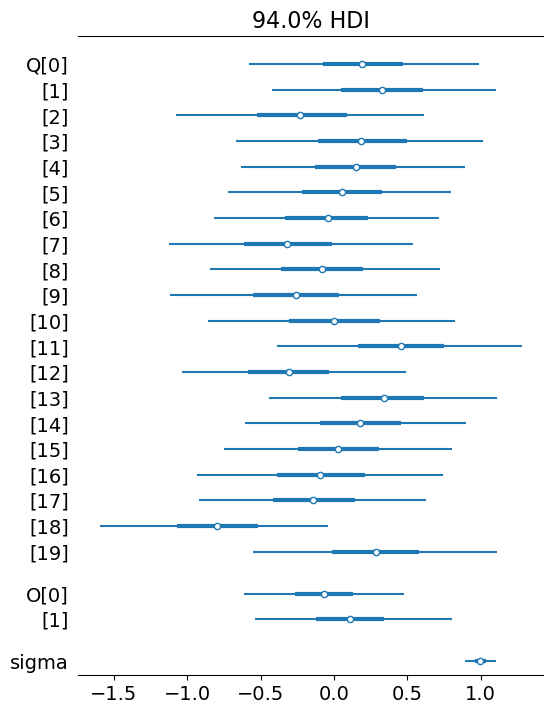

In [21]:
az.plot_forest(trace_2, var_names=("Q", "O", "sigma"), combined=True)
plt.show()

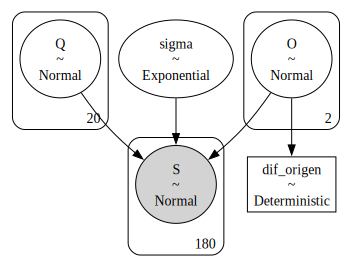

In [22]:
model_to_graphviz(wine_model_2)

Agregando H y D

In [23]:
with pm.Model() as wine_model_3:
    # Parameters
    Q = pm.Normal('Q', mu=0, sigma=1, shape=n_wines)
    O = pm.Normal('O', mu=0, sigma=1, shape=n_origins)
    H = pm.Normal('H', mu=0, sigma=1, shape=n_judges)
    D = pm.HalfNormal('D', sigma=1, shape=n_judges)
    sigma = pm.Exponential('sigma', lam=1)

    # Transformations: media_score
    media_score = (Q[wine-1] + O[origin-1] - H[judge-1]) * D[judge-1]
                   
    # Model
    S_observed = pm.Normal('S', mu=media_score, sigma=sigma, observed=S)

    # Generated quantities
    dif_origen = pm.Deterministic('dif_origen', O[0] - O[1])

    # Sampling
    trace_3 = pm.sample(
        draws=2000,
        tune=1000,
        chains=4,
        cores=4,
        target_accept=0.9
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Q, O, H, D, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 33 seconds.


In [24]:
az.summary(trace_3, var_names=["O", "Q", "H", "D", "sigma"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
O[0],-0.118,0.442,-0.942,0.721,0.008,0.006,3184.0,4877.0,1.0
O[1],0.196,0.488,-0.732,1.087,0.009,0.006,3222.0,4462.0,1.0
Q[0],0.365,0.556,-0.668,1.404,0.008,0.006,4333.0,5569.0,1.0
Q[1],0.507,0.536,-0.488,1.548,0.007,0.005,6627.0,6331.0,1.0
Q[2],-0.490,0.557,-1.471,0.607,0.007,0.005,5802.0,5906.0,1.0
Q[3],0.216,0.590,-0.910,1.302,0.009,0.007,4577.0,4499.0,1.0
Q[4],0.278,0.552,-0.754,1.302,0.007,0.006,6218.0,6025.0,1.0
Q[5],0.186,0.553,-0.867,1.212,0.007,0.006,6155.0,5755.0,1.0
Q[6],0.060,0.558,-0.979,1.110,0.007,0.006,5712.0,5131.0,1.0
Q[7],-0.526,0.571,-1.566,0.583,0.008,0.006,5032.0,5289.0,1.0


In [25]:
summary_wm3 = az.summary(trace_3, var_names=["O", "Q", "H", "D", "sigma"])
summary_wm3 = summary_wm3[~summary_wm3.index.str.contains("lp__")]
summary_wm3 = summary_wm3[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat', 'ess_bulk', 'ess_tail']]
summary_wm3.columns = ['mean', 'sd', 'q3', 'q97', 'rhat', 'ess_bulk', 'ess_tail']
summary_wm3 = summary_wm3.round(5)
print(summary_wm3)

        mean     sd     q3    q97  rhat  ess_bulk  ess_tail
O[0]  -0.118  0.442 -0.942  0.721   1.0    3184.0    4877.0
O[1]   0.196  0.488 -0.732  1.087   1.0    3222.0    4462.0
Q[0]   0.365  0.556 -0.668  1.404   1.0    4333.0    5569.0
Q[1]   0.507  0.536 -0.488  1.548   1.0    6627.0    6331.0
Q[2]  -0.490  0.557 -1.471  0.607   1.0    5802.0    5906.0
Q[3]   0.216  0.590 -0.910  1.302   1.0    4577.0    4499.0
Q[4]   0.278  0.552 -0.754  1.302   1.0    6218.0    6025.0
Q[5]   0.186  0.553 -0.867  1.212   1.0    6155.0    5755.0
Q[6]   0.060  0.558 -0.979  1.110   1.0    5712.0    5131.0
Q[7]  -0.526  0.571 -1.566  0.583   1.0    5032.0    5289.0
Q[8]   0.101  0.564 -0.984  1.134   1.0    4746.0    5245.0
Q[9]  -0.366  0.546 -1.387  0.653   1.0    5646.0    5686.0
Q[10]  0.175  0.583 -0.942  1.265   1.0    5363.0    5400.0
Q[11]  0.821  0.577 -0.288  1.887   1.0    5728.0    6092.0
Q[12] -0.824  0.591 -1.910  0.296   1.0    4226.0    5342.0
Q[13]  0.630  0.562 -0.415  1.726   1.0 

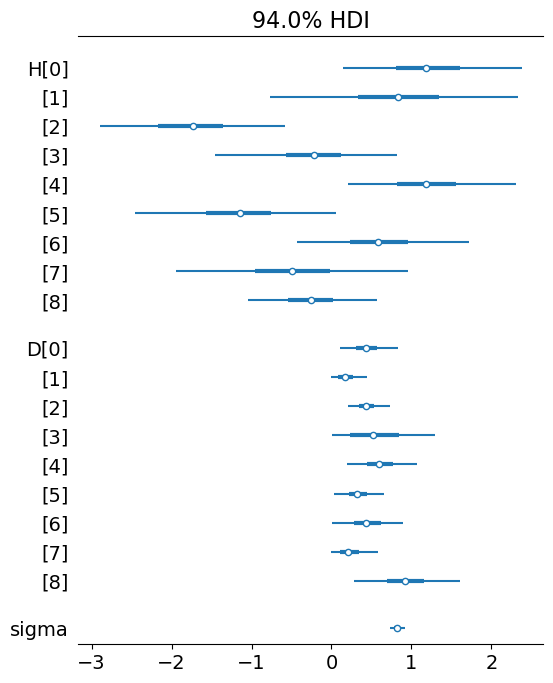

In [26]:
az.plot_forest(trace_3, var_names=("H", "D", "sigma"), combined=True)
plt.show()

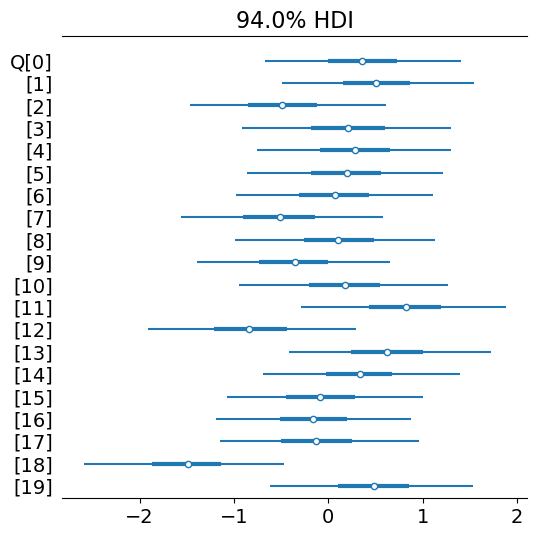

In [27]:
az.plot_forest(trace_3, var_names=("Q"), combined=True)
plt.show()

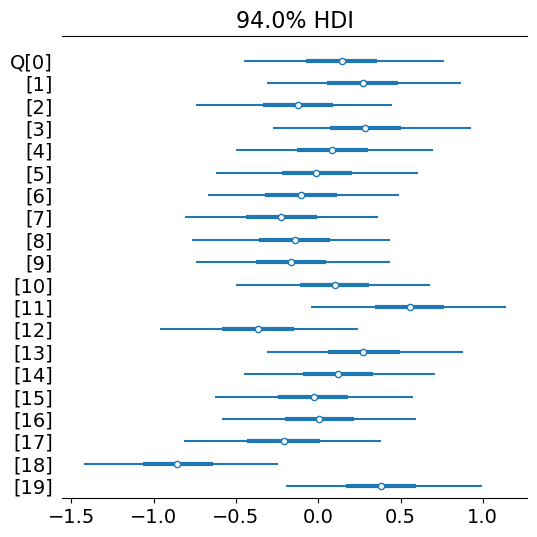

In [28]:
az.plot_forest(trace, var_names=("Q"), combined=True)
plt.show()

In [29]:
summary_wm3 = az.summary(trace_3, var_names=["dif_origen"])
summary_wm3 = summary_wm3[~summary_wm3.index.str.contains("lp__")]
summary_wm3 = summary_wm3[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat', 'ess_bulk', 'ess_tail']]
summary_wm3.columns = ['mean', 'sd', 'q3', 'q97', 'rhat', 'ess_bulk', 'ess_tail']
summary_wm3 = summary_wm3.round(5)
print(summary_wm3)

             mean     sd     q3    q97  rhat  ess_bulk  ess_tail
dif_origen -0.314  0.508 -1.243  0.667   1.0    3171.0    4315.0


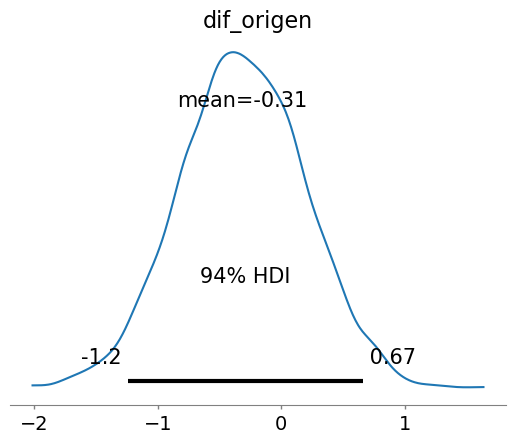

In [30]:
dif_origen_data = trace_3.posterior['dif_origen']
az.plot_posterior(dif_origen_data, bins='auto')
plt.show()

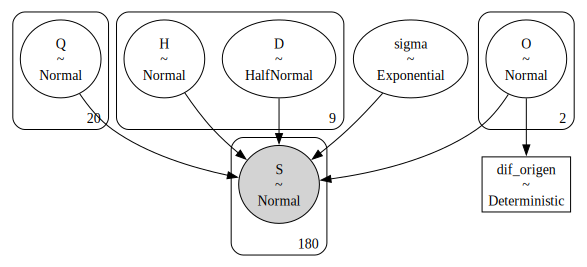

In [31]:
model_to_graphviz(wine_model_3)